In [52]:
import pandas as pd
import nltk
import numpy as np
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import re
import string
import emoji
from nltk.corpus import wordnet


In [53]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [54]:
df = pd.read_csv('youtube_sentiment.csv')

In [55]:
comment_body = df['Comment']

In [56]:
comments=comment_body.to_numpy()

In [57]:
comments

array(['Just subscribed, downloading this and will watch in depth later. Excited to learn from what you guys have built',
       'Could you please do ERPnext tutorial ?',
       'I hate that this is where programming is headed. I’ve chosen the wrong career. So lame. ',
       ..., 'Didnt understand a single word',
       'there are some problem with your mic ',
       'finding it difficult to understand '], dtype=object)

In [58]:
def remove_punctuation(txt):
#     allowed_punctuations = string.punctuation.replace('?', '').replace('!', '').replace("'", '')
    allowed_punctuations = string.punctuation.replace('?', '').replace("'", '')
    #list comprehension is used for filtering allowed punctuations.
    txt_nopunc = "".join([c for c in txt if c not in allowed_punctuations])
    return txt_nopunc
def remove_multiple_spaces(txt):
#     # Remove multiple spaces
    txt = re.sub(r'\s+', ' ', txt)
    return txt
def lemmatize_text(txt):
    lemmatizer = WordNetLemmatizer()
    tokens = word_tokenize(txt)
    lemmatized_tokens = []
    
    for token in tokens:
        pos = get_wordnet_pos(token)
        if pos:
            lemmatized_token = lemmatizer.lemmatize(token, pos=pos)
        else:
            lemmatized_token = lemmatizer.lemmatize(token)
        lemmatized_tokens.append(lemmatized_token)
    
    lemmatized_text = ' '.join(lemmatized_tokens)
    return lemmatized_text

def get_wordnet_pos(token):
    tag = nltk.pos_tag([token])[0][1][0].upper()
    tag_dict = {
        'J': wordnet.ADJ,
        'N': wordnet.NOUN,
        'V': wordnet.VERB,
        'R': wordnet.ADV
    }
    return tag_dict.get(tag, wordnet.NOUN)

def remove_numbers_and_single_words(txt):
    # Remove numbers
    txt = re.sub(r'\d+', '', txt)
    
    # Remove single words
    txt = ' '.join([word for word in txt.split() if len(word) > 1])

    # Remove new line character
    txt = txt.replace('\n', '')
    return txt

def remove_urls(txt):
    # Remove URLs
    txt = re.sub(r'http\S+|www\S+|https\S+', '', txt)

    return txt
# def remove_repeated(txt): 
#     txt = re.sub(r'(.)\1+', r'\1', txt)
#     return txt
# def remove_contractions(txt):
#     expanded_text = contractions.fix(txt)
#     return expanded_text

In [59]:
stopwords_list = stopwords.words('english')
# predefined stopwords that won't be removed from the dataset.
stopwords_list = [word for word in stopwords_list if word not in['no', 'not', 'how', 'what', 'which', 'who', 'whom', 'why', 'do', 'is', 'does', 'are', 'was', 'were', 'will', 'am', 'could', 'would', 'should', 'can', 'did', 'had', 'have', 'however']]
#applied the preprocessing rules on the comment column.
df['Comment'] = df['Comment'].str.lower()
df['Comment'] = df['Comment'].apply(remove_punctuation)
# df['Comment'] = df['Comment'].apply(lambda x:remove_contractions(x))
df['Comment'] = df['Comment'].apply(remove_multiple_spaces)
df['Comment'] = df['Comment'].apply(lambda x:remove_numbers_and_single_words(x))
df['Comment'] = df['Comment'].apply(lambda x: emoji.replace_emoji(x, ''))
df['Comment'] = df['Comment'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords_list]))
df['Comment'] = df['Comment'].apply(lemmatize_text)
df['Comment'] = df['Comment'].apply(lambda x:remove_urls(x))
# df['Comment'] = df['Comment'].apply(lambda x:remove_repeated(x))
df = df[df['Comment'].str.strip().astype(bool)]

In [60]:
from sklearn.preprocessing import LabelEncoder

In [61]:
predicted_class = df['Predicted Class']
# Define the desired class labels and their corresponding encoded values
class_labels = ['Positive', 'Negative', 'Corrective', 'Interrogative','Imperative','Neutral',]
encoded_labels = [1, 2, 3, 4, 5, 6]

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit the label encoder on the class labels and their encoded values
label_encoder.fit(class_labels)

# Map the predicted class to the corresponding encoded values
encoded_predicted_class = label_encoder.transform(predicted_class)

# Create a mapping dictionary for the encoded labels
label_mapping = dict(zip(class_labels, encoded_labels))

# Map the encoded values to the desired labels
mapped_predicted_class = [label_mapping[label] for label in predicted_class]

# Create a new column 'Label' based on the mapped predicted class
df['Label'] = mapped_predicted_class

In [62]:
df.to_csv('clean_dataset.csv', index=False)

In [63]:
df

,Comment,Predicted Class,Label
0,subscribed download will watch depth later exc...,Positive,1
1,could please do erpnext tutorial,Interrogative,4
2,hate be program be head i ’ ve chosen wrong ca...,Negative,2
3,can please share use sharegpt ?,Interrogative,4
4,fact video be hour non chatgpt one be around h...,Negative,2
...,...,...,...
1998,love chanel amaze super excellent chanel love,Positive,1
1999,treehouse course ? ?,Interrogative,4
2000,didnt understand single word,Negative,2
2001,be problem mic,Negative,2


In [64]:
df['Predicted Class'].value_counts()

Positive         773
Interrogative    578
Neutral          206
Negative         202
Corrective       155
Imperative        86
Name: Predicted Class, dtype: int64

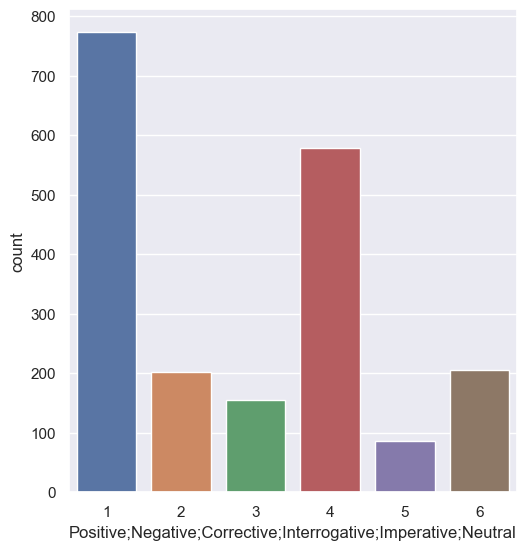

In [65]:
#Plot total number of sentiment

import matplotlib.pyplot as plt
%matplotlib inline
# !pip install seaborn
import seaborn as sns
sns.set(rc={'figure.figsize':(12.7,6.27)})

plt.subplot(1,2,1)
news_plt = sns.countplot(x = 'Label', data = df)
news_plt.set_xlabel('Positive;Negative;Corrective;Interrogative;Imperative;Neutral')
plt.show()

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [67]:
vectorizer = TfidfVectorizer(encoding='utf-8')
X = vectorizer.fit_transform(df['Comment']).toarray()
terms = vectorizer.get_feature_names() if hasattr(vectorizer, 'get_feature_names') else vectorizer.vocabulary_.keys()
print(len(terms))

3241


In [68]:
X.shape

(2000, 3241)

In [69]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [70]:
terms

dict_keys(['subscribed', 'download', 'will', 'watch', 'depth', 'later', 'excite', 'learn', 'what', 'guy', 'have', 'built', 'could', 'please', 'do', 'erpnext', 'tutorial', 'hate', 'be', 'program', 'head', 've', 'chosen', 'wrong', 'career', 'lame', 'can', 'share', 'use', 'sharegpt', 'fact', 'video', 'hour', 'non', 'chatgpt', 'one', 'around', 'kind', 'defeat', 'point', 'update', 'web', 'browser', 'people', 'need', 'course', 'how', 'ask', 'question', 'ah', 'man', 'well', 'good', 'hallucination', 'technical', 'background', 'work', 'fix', 'error', 'not', 'chat', 'gpt', 'waste', 'time', 'box', 'rock', 'nice', 'make', 'believe', 'world', 'still', 'place', 'linux', 'year', 'great', 'interest', 'appreciate', 'gj', 'much', 'beginner', 'add', 'english', 'subtitle', 'remove', 'bracket', 'timestamps', 'youtube', 'should', 'detect', 'section', 'let', 'navigate', 'interface', 'may', 'also', 'millisecond', 'themis', 'possible', 'create', 'bash', 'script', 'stopstart', 'tomcat', 'holly', 'service', 'reb

In [71]:
y = df['Label']

In [72]:
#applied SMOTE to balance the dataset
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

In [73]:
# Define SMOTE-Tomek Links
resample=SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
X, y = resample.fit_resample(X, y)

In [74]:
from sklearn.model_selection import train_test_split

In [75]:


# Splitting the data into training and remaining dataset
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=42)

# Splitting the remaining data into validation and test sets
X_valid, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.4, random_state=42)

# Printing the shapes of the datasets
print("Training set - X:", X_train.shape)
print("Training set - y:", y_train.shape)
print("Validation set - X:", X_valid.shape)
print("Validation set - y:", y_valid.shape)
print("Test set - X:", X_test.shape)

Training set - X: (2781, 3241)
Training set - y: (2781,)
Validation set - X: (1112, 3241)
Validation set - y: (1112,)
Test set - X: (742, 3241)


In [76]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

Validation Accuracy: 0.8660071942446043
Test Accuracy: 0.8638814016172507
              precision    recall  f1-score   support

           1       0.87      0.78      0.82       120
           2       0.88      0.91      0.89       140
           3       0.92      0.98      0.95       134
           4       0.87      0.68      0.76       134
           5       0.85      0.98      0.91       116
           6       0.79      0.86      0.82        98

    accuracy                           0.86       742
   macro avg       0.86      0.86      0.86       742
weighted avg       0.86      0.86      0.86       742



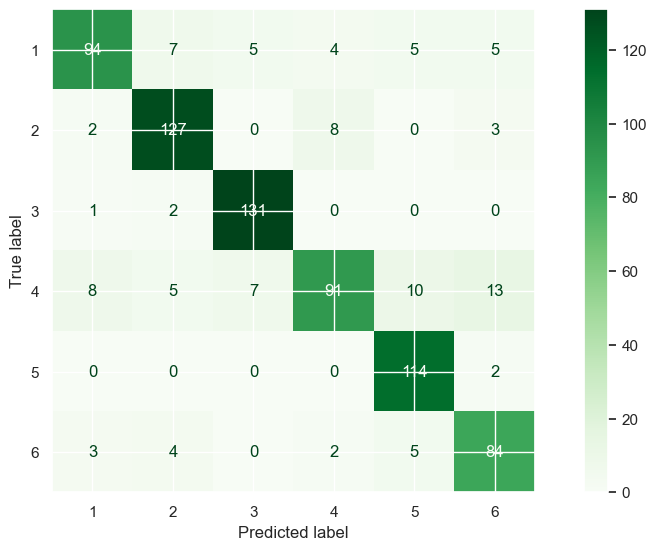

In [77]:
# Create an instance of the Multinomial Naive Bayes model
MNB = MultinomialNB()

# Train the model on the training set
# MNB.fit(X_train_smote, y_train_smote)
MNB.fit(X_train, y_train)
# Evaluate the model on the validation set
valid_accuracy = MNB.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = MNB.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_MNB = MNB.predict(X_test)
print(classification_report(y_test, pred_MNB)) 
cm = confusion_matrix(y_test, pred_MNB)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=MNB.classes_)
disp.plot(cmap='Greens')
plt.show()

Validation Accuracy: 0.8830935251798561
Test Accuracy: 0.8854447439353099
              precision    recall  f1-score   support

           1       0.85      0.78      0.81       120
           2       0.87      0.89      0.88       140
           3       0.96      0.97      0.97       134
           4       0.86      0.77      0.81       134
           5       0.95      0.98      0.97       116
           6       0.81      0.94      0.87        98

    accuracy                           0.89       742
   macro avg       0.88      0.89      0.88       742
weighted avg       0.89      0.89      0.88       742



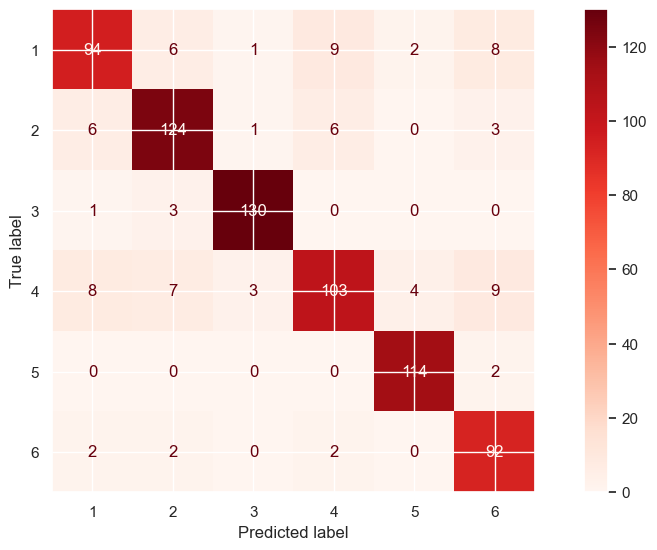

In [78]:
LR = LogisticRegression(random_state=0)
LR.fit(X_train, y_train)
valid_accuracy = LR.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = LR.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_LR = LR.predict(X_test)
print(classification_report(y_test, pred_LR)) 
cm = confusion_matrix(y_test, pred_LR)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=LR.classes_)
disp.plot(cmap='Reds')
plt.show()

Validation Accuracy: 0.7868705035971223
Test Accuracy: 0.761455525606469
              precision    recall  f1-score   support

           1       0.62      0.75      0.68       120
           2       0.80      0.72      0.76       140
           3       0.86      0.76      0.81       134
           4       0.64      0.67      0.65       134
           5       0.96      0.95      0.96       116
           6       0.73      0.73      0.73        98

    accuracy                           0.76       742
   macro avg       0.77      0.76      0.77       742
weighted avg       0.77      0.76      0.76       742



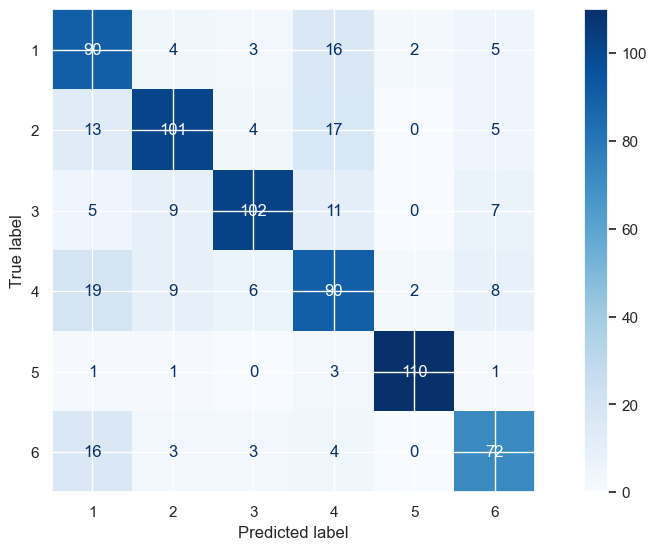

In [79]:
DT = DecisionTreeClassifier(random_state=0)
DT.fit(X_train, y_train)
valid_accuracy = DT.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = DT.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_DT = DT.predict(X_test)
print(classification_report(y_test, pred_DT)) 
cm = confusion_matrix(y_test, pred_DT)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=DT.classes_)
disp.plot(cmap='Blues')
plt.show()

Validation Accuracy: 0.8498201438848921
Test Accuracy: 0.866576819407008
              precision    recall  f1-score   support

           1       0.71      0.84      0.77       120
           2       0.89      0.83      0.86       140
           3       0.98      0.90      0.94       134
           4       0.81      0.84      0.83       134
           5       0.95      0.99      0.97       116
           6       0.91      0.80      0.85        98

    accuracy                           0.87       742
   macro avg       0.87      0.87      0.87       742
weighted avg       0.87      0.87      0.87       742



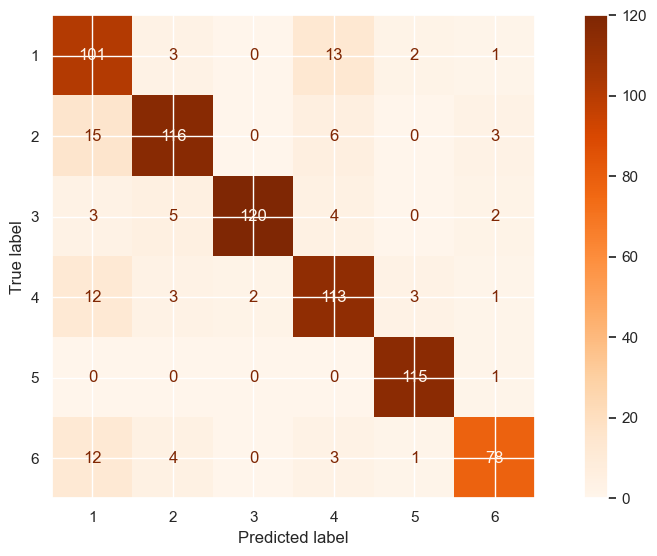

In [80]:
RF = RandomForestClassifier(n_estimators=10)
RF.fit(X_train, y_train)
valid_accuracy = RF.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = RF.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_RF = RF.predict(X_test)
print(classification_report(y_test, pred_RF)) 
cm = confusion_matrix(y_test, pred_RF)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=RF.classes_)
disp.plot(cmap='Oranges')
plt.show()

Validation Accuracy: 0.7437050359712231
Test Accuracy: 0.7250673854447439
              precision    recall  f1-score   support

           1       1.00      0.35      0.52       120
           2       0.74      0.91      0.82       140
           3       0.71      0.98      0.82       134
           4       0.82      0.31      0.45       134
           5       0.73      0.97      0.83       116
           6       0.60      0.85      0.70        98

    accuracy                           0.73       742
   macro avg       0.77      0.73      0.69       742
weighted avg       0.77      0.73      0.69       742



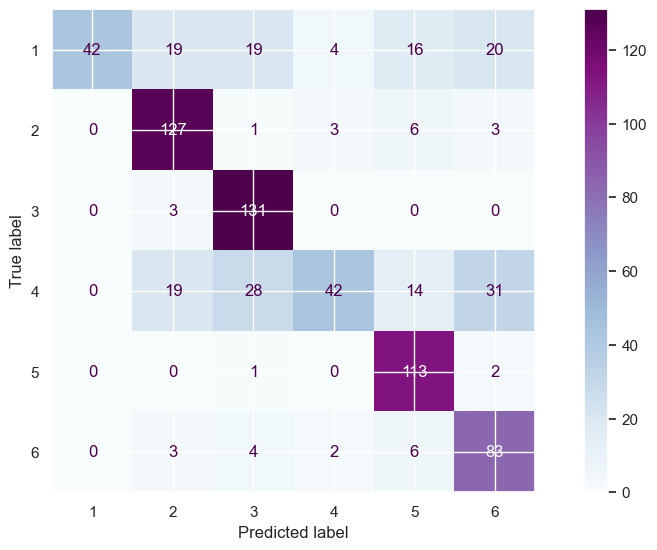

In [81]:
KNN= KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)
valid_accuracy = KNN.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = KNN.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)
pred_KNN = KNN.predict(X_test)
print(classification_report(y_test, pred_KNN)) 
cm = confusion_matrix(y_test, pred_KNN)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=KNN.classes_)
disp.plot(cmap='BuPu')
plt.show()

Validation Accuracy: 0.914568345323741
Test Accuracy: 0.9231805929919138
              precision    recall  f1-score   support

           1       0.77      0.90      0.83       120
           2       0.98      0.89      0.93       140
           3       1.00      0.99      0.99       134
           4       0.86      0.90      0.88       134
           5       1.00      0.97      0.99       116
           6       0.97      0.89      0.93        98

    accuracy                           0.92       742
   macro avg       0.93      0.92      0.92       742
weighted avg       0.93      0.92      0.92       742



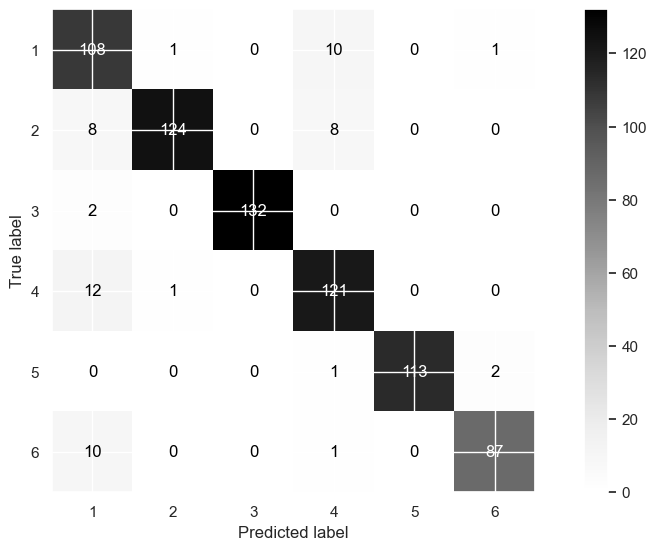

In [82]:
SVM = svm.SVC(decision_function_shape='ovo',probability= True)
SVM.fit(X_train, y_train)
valid_accuracy = SVM.score(X_valid, y_valid)
print("Validation Accuracy:", valid_accuracy)

# Evaluate the model on the test set
test_accuracy = SVM.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

pred_SVM = SVM.predict(X_test)
print(classification_report(y_test, pred_SVM)) 
cm = confusion_matrix(y_test, pred_SVM)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=SVM.classes_)
disp.plot(cmap='Greys')
plt.show()

In [83]:
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import label_binarize

# Instantiate the classifiers and make a list
classifiers = [
    MultinomialNB(),
    LogisticRegression(random_state=0),
    DecisionTreeClassifier(random_state=0),
    RandomForestClassifier(max_depth=200, random_state=0),
    KNeighborsClassifier(n_neighbors=1),
    svm.SVC(decision_function_shape='ovo', probability=True)
]

# Binarize the labels for multi-class classification
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr', 'tpr', 'auc'])

# Train the models and record the results
for cls in classifiers:
    model = cls.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test)
    else:
        y_scores = model.decision_function(X_test)
    auc = roc_auc_score(y_test_bin, y_scores, average='macro')
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_scores.ravel())
    
    result_table = result_table.append({'classifiers': cls.__class__.__name__, 'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)

C:\Users\ASUS\AppData\Local\Temp\ipykernel_18720\2690778321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__, 'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18720\2690778321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__, 'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)
C:\Users\ASUS\AppData\Local\Temp\ipykernel_18720\2690778321.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_table = result_table.append({'classifiers': cls.__class__.__name__, 'fpr': fpr, 'tpr': tpr, 'auc': auc}, ignore_index=True)
C

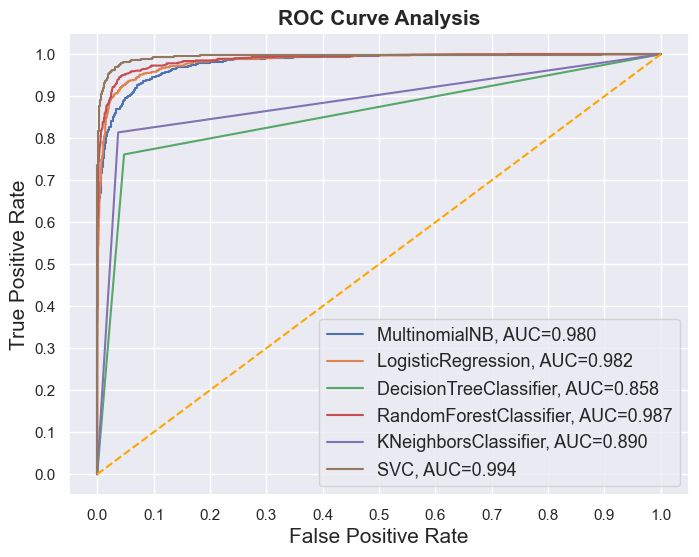

In [84]:

# Plot ROC curves
fig = plt.figure(figsize=(8, 6))

for i in result_table.index:
    fpr = result_table.loc[i, 'fpr']
    tpr = result_table.loc[i, 'tpr']
    auc = result_table.loc[i, 'auc']
    
    plt.plot(fpr, tpr, label="{}, AUC={:.3f}".format(result_table.loc[i, 'classifiers'], auc))

plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

In [85]:

from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    'MNB': MultinomialNB(),
    'LR': LogisticRegression(random_state=0),
    'DT': DecisionTreeClassifier(random_state=0),
    'RF': RandomForestClassifier(max_depth=200, random_state=0),
    'KNN': KNeighborsClassifier(n_neighbors=1),
    'SVM': svm.SVC(decision_function_shape='ovo')
}

accuracy = {}
precision = {}
recall = {}

for key, model in models.items():
    # Fit the classifier
    model.fit(X_train, y_train)
    
    # Make predictions
    predictions = model.predict(X_test)
    
    # Calculate metrics
    accuracy[key] = accuracy_score(y_test, predictions)
    precision[key] = precision_score(y_test, predictions, average='macro')
    recall[key] = recall_score(y_test, predictions, average='macro')

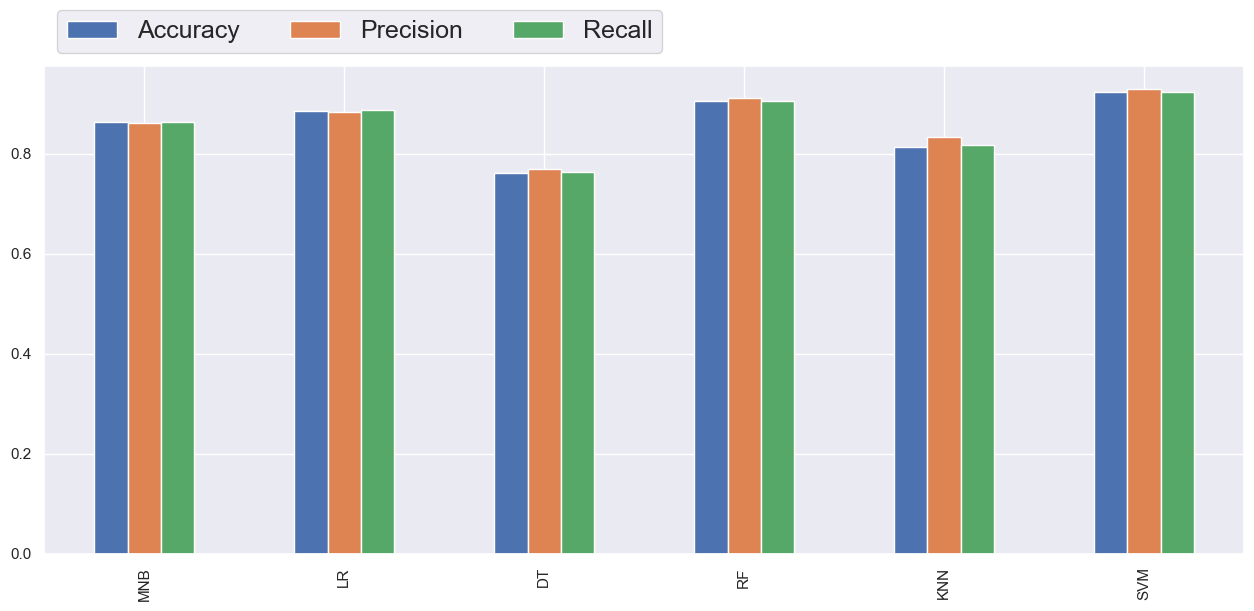

In [86]:
df_model = pd.DataFrame({'Accuracy': accuracy, 'Precision': precision, 'Recall': recall})

ax = df_model.plot.bar()
ax.legend(
    ncol=len(models.keys()), 
    bbox_to_anchor=(0, 1), 
    loc='lower left', 
    prop={'size': 18}
)
plt.tight_layout()

In [87]:
pip install wordcloud matplotlib

Note: you may need to restart the kernel to use updated packages.


In [88]:
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt

In [89]:
# all_comments = ' '.join(df['Comment'])
# wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments )

# # Plot the word cloud
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.show()

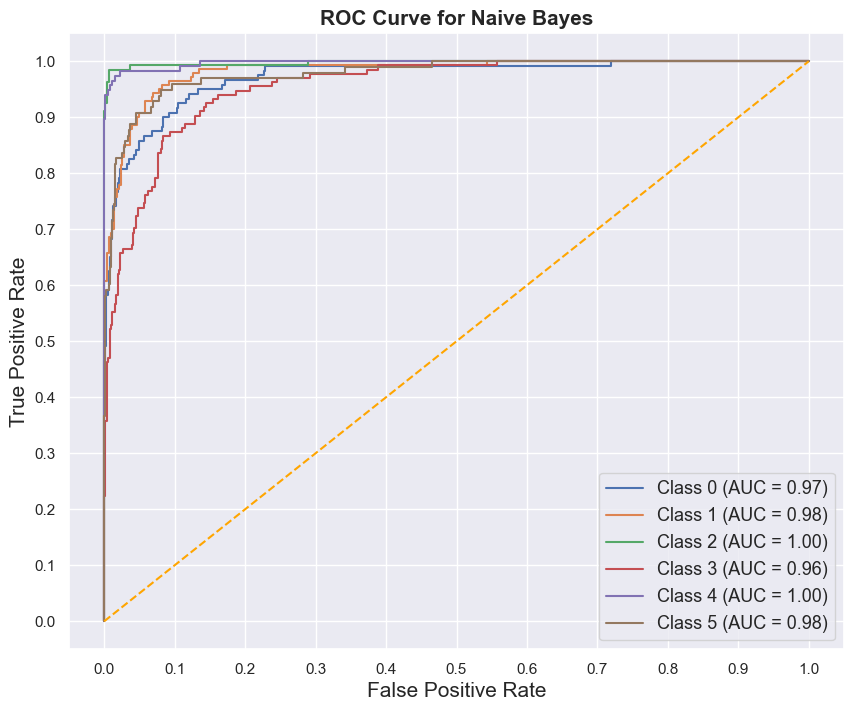

In [90]:
from sklearn.metrics import roc_curve, auc
# Binarize the labels
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = MNB.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for Naive Bayes', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

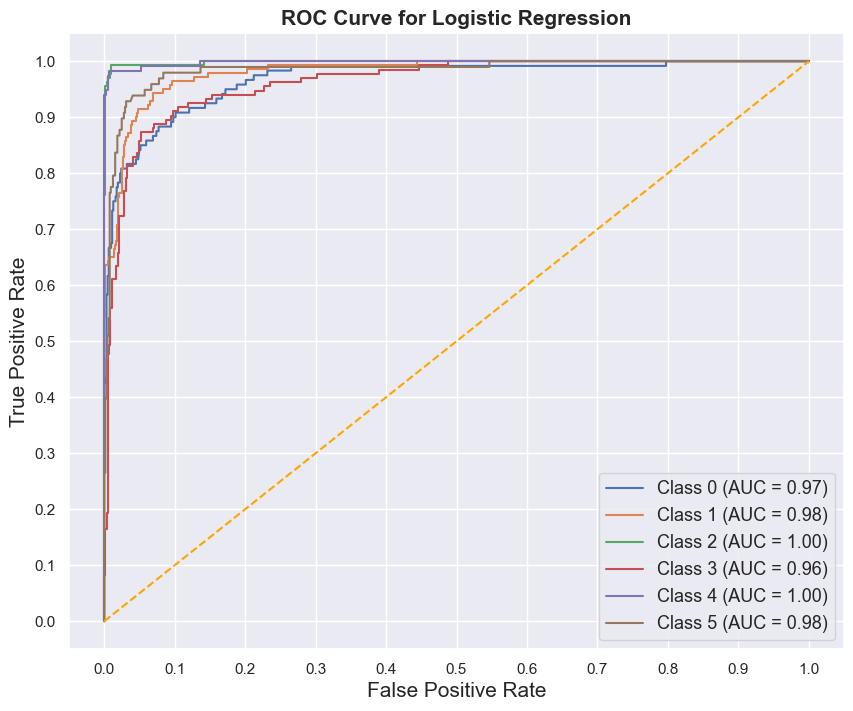

In [91]:
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = LR.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for Logistic Regression', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

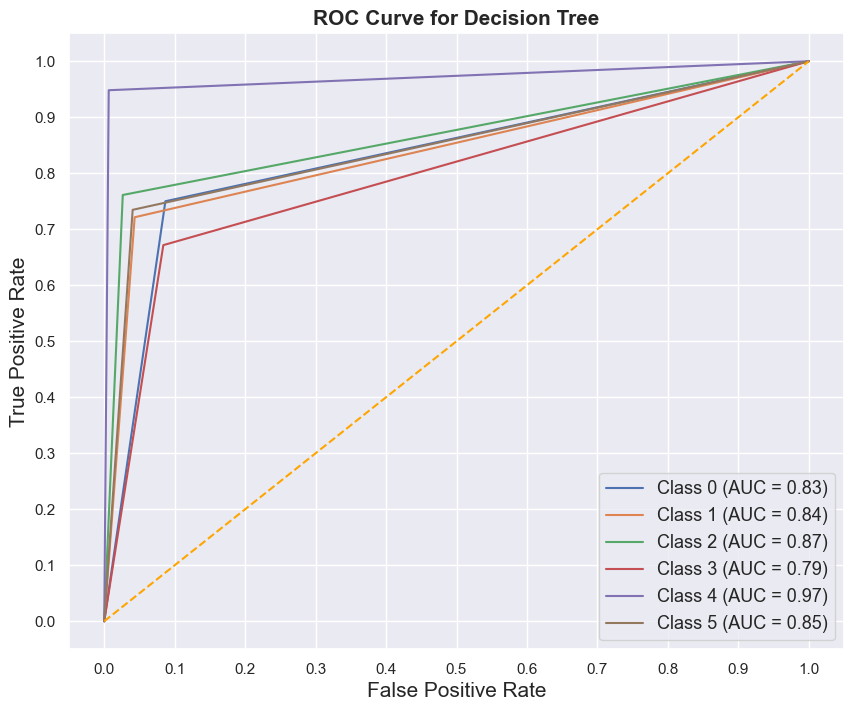

In [92]:
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = DT.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for Decision Tree', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

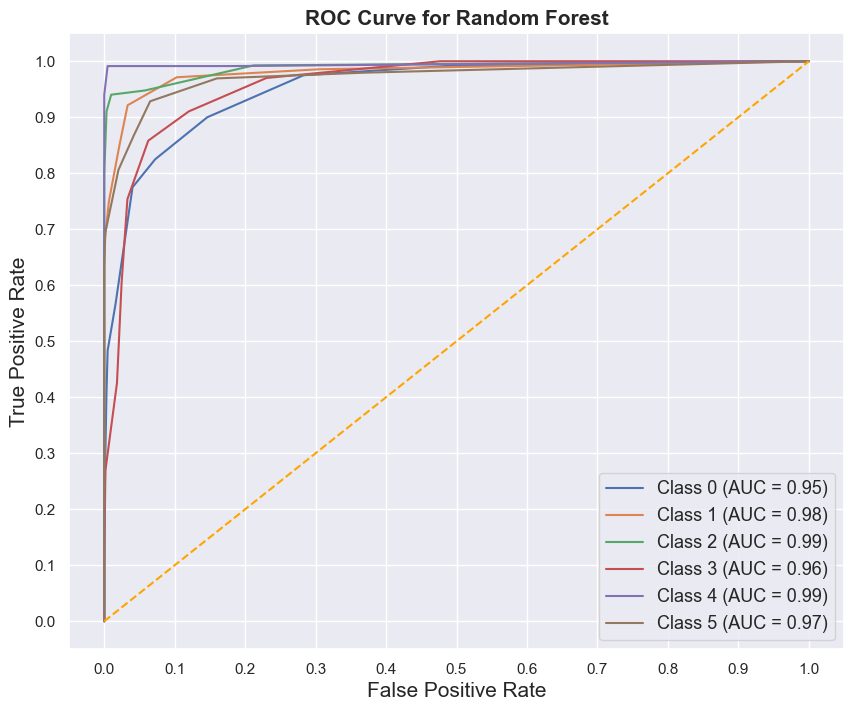

In [93]:
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = RF.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for Random Forest', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

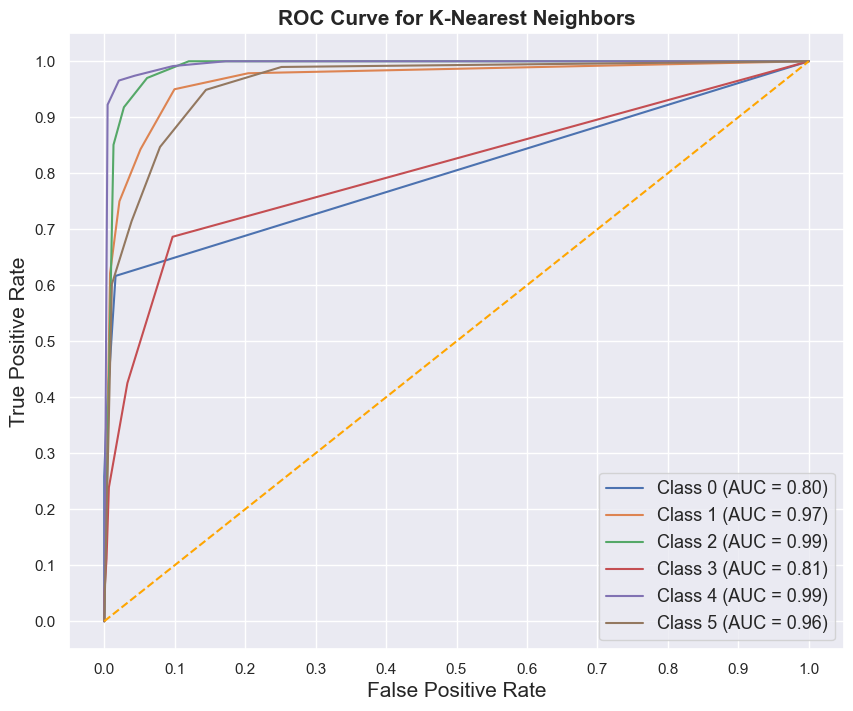

In [94]:
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = KNN.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for K-Nearest Neighbors', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

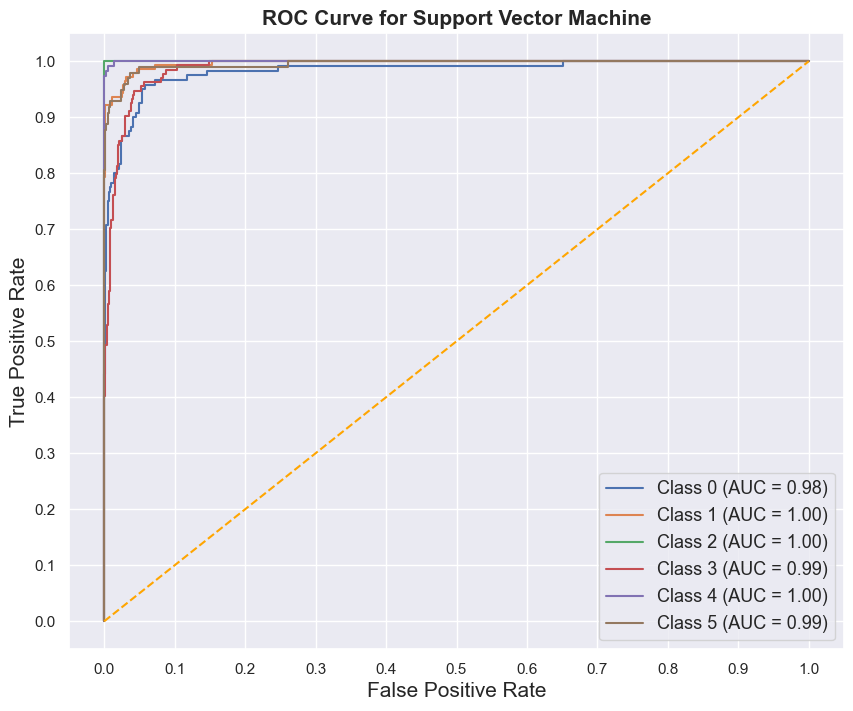

In [95]:
y_bin = label_binarize(y_test, classes=[ 1, 2, 3, 4, 5,6])

# Get the predicted probabilities for each class
y_score = SVM.predict_proba(X_test)

# Plot ROC curve for each class
plt.figure(figsize=(10, 8))

for i in range(6):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')
    
plt.plot([0, 1], [0, 1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve for Support Vector Machine', fontweight='bold', fontsize=15)
plt.legend(prop={'size': 13}, loc='lower right')

plt.show()

In [96]:
comments = [
    'What about security in minimal api?',
    'The code just looks super ugly lol',
    'Thank you so much, you save my life!',    
    'First today',
    'I think ""gym"" is referring to an institution, where one can train the muscles... Not ""Gymnasium"""',
    'Sir Plz Upload React Native Tutorials from beginner to advance with projects plz',
    'The source function for the django isn’t working',
    'Please please please make azure databricks using pyspark and azure dp 203 full course'
]
comments_count = vectorizer.transform(comments)

In [97]:
print(MNB.predict(comments_count))
print(LR.predict(comments_count))
print(DT.predict(comments_count))
print(RF.predict(comments_count))
print(KNN.predict(comments_count))
comments_count_dense = comments_count.toarray()
print(SVM.predict(comments_count_dense))

[4 2 1 6 4 5 2 5]
[4 2 1 6 4 5 2 5]
[4 1 1 6 4 5 3 5]
[4 2 1 6 4 5 2 5]
[5 2 1 6 2 5 2 5]
[4 2 1 6 4 5 2 5]


In [98]:
# Model prediction Section
def output_label(n):
    if n == 1:
        return "Positive"
    elif n == 2:
        return "Negative"
    elif n == 3:
        return "Corrective"
    elif n == 4:
        return "Interrogative"
    elif n == 5:
        return "Imperative"
    elif n == 6:
        return "Neutral"


def manual_testing(comment):
    stopwords_list = stopwords.words('english')
    stopwords_list = [word for word in stopwords_list if word not in['no', 'not', 'how', 'what', 'which', 'who', 'whom', 'why', 'do', 'is', 'does', 'are', 'was', 'were', 'will', 'am', 'could', 'would', 'should', 'can', 'did', 'had', 'have', 'however']]
    comment = comment.lower()
    comment = remove_punctuation(comment)
    comment = remove_multiple_spaces(comment)
    comment = remove_numbers_and_single_words(comment)
    comment = emoji.replace_emoji(comment, '')
    comment = ' '.join([word for word in comment.split() if word not in stopwords_list])
    comment = lemmatize_text(comment)
    comment = remove_urls(comment)
#     print(comment)
    comment_xv_test = vectorizer.transform([comment])
    comment_xv_test_1 = comment_xv_test.toarray()
    pred_MNB = MNB.predict(comment_xv_test)
    pred_LR = LR.predict(comment_xv_test)
    pred_DT = DT.predict(comment_xv_test)
    pred_RF = RF.predict(comment_xv_test)
    pred_KNN = KNN.predict(comment_xv_test)
    pred_SVM = SVM.predict(comment_xv_test_1)
    print("predictions: \n")
    print(f'MNB: {output_label(pred_MNB[0])}')
    print(f'LR: {output_label(pred_LR[0])}')
    print(f'DT: {output_label(pred_DT[0])}')
    print(f'RF: {output_label(pred_RF[0])}')
    print(f'KNN: {output_label(pred_KNN[0])}')
    print(f'SVM: {output_label(pred_SVM[0])}')

In [99]:

# Decision
inp_comment = str(input("Enter Comment: "))
print("Actual: Imperative")
manual_testing(inp_comment)

Enter Comment: please stick to wht you said
Actual: Imperative
predictions: 

MNB: Imperative
LR: Imperative
DT: Imperative
RF: Imperative
KNN: Imperative
SVM: Imperative


In [100]:

# Decision
inp_comment = str(input("Enter Comment: "))
print("Actual: Interrogative")
manual_testing(inp_comment)

Enter Comment: do you know how that works?
Actual: Interrogative
predictions: 

MNB: Interrogative
LR: Interrogative
DT: Positive
RF: Interrogative
KNN: Interrogative
SVM: Interrogative
